In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"BTC_USD.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-18,244.936661,250.516663,239.603333,240.546661,240.546661,82537500
1,2022-07-19,245.000000,247.139999,236.976669,245.529999,245.529999,80890200
2,2022-07-20,246.783340,250.663330,243.483337,247.500000,247.500000,88864200
3,2022-07-21,255.106674,273.266663,254.866669,271.706665,271.706665,142032300
4,2022-07-22,276.220001,280.786682,270.713318,272.243347,272.243347,103472700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,212.832005,217.544674,207.870571,212.826003,212.826003,1.237990e+08
std,53.191554,53.808523,52.629266,53.186579,53.186579,4.941222e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,8.446815e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.197280e+08
75%,260.385010,266.154999,256.736663,261.154999,261.154999,1.591312e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


In [6]:
#Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [7]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [8]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [9]:
#Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

In [10]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
246,1.700642,0.424350,269.790009,91972400,NaN
247,1.863994,-1.570585,271.989990,95672100,NaN
248,3.270512,1.205433,277.899994,112681500,NaN
249,3.253588,1.577559,281.380005,119771100,NaN
250,3.053921,1.308307,290.380005,131106900,NaN


In [11]:
#Make fetaure and label arrays
X = np.array(df.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/tmp/ipykernel_7300/1871459895.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["PriceNextMonth"], 1))


In [12]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [13]:
#Define the prediction model
model = RandomForestRegressor()

In [14]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.6716968852989327


In [16]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [17]:
predictions = model.predict(X_Check)

In [18]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

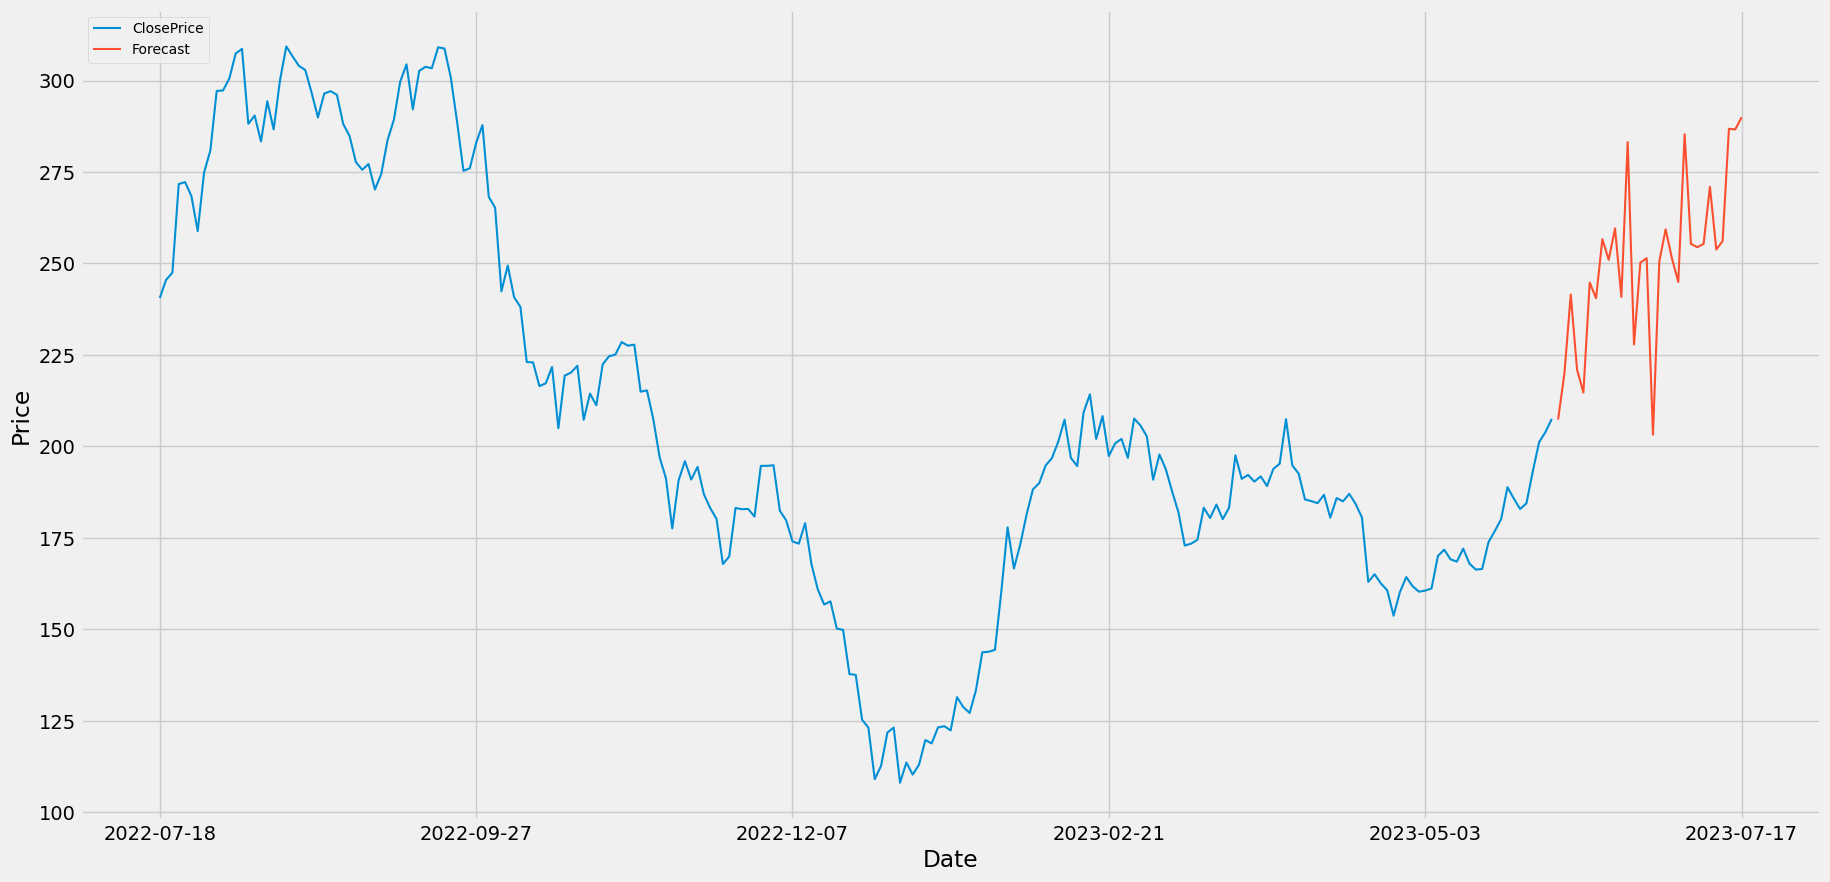

In [19]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':10})
plt.xlabel('Date')
plt.ylabel('Price')